In [234]:
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# FIXME: graph for depenent and independent variables are switched :(

#### HDI rank:

Type: Ordinal variable.

Reason: The HDI rank represents a ranking of countries based on their Human Development Index. The order is meaningful, but the difference between ranks is not necessarily uniform.

### Country:

Type: Nominal variable.

Reason: The names of countries are categorical and serve as labels. They do not imply any numerical or ranked relationship between them.

### Human Development Index (HDI) Value:

Type: Interval variable.

Reason: HDI values represent a composite index on a scale (usually 0 to 1), with meaningful differences between values, but no true zero point.

### Life expectancy at birth (years):

Type: Ratio variable.

Reason: Life expectancy is a continuous, quantitative measure with a meaningful zero point (0 years), allowing for meaningful comparisons of ratios (e.g., 80 years is twice as long as 40 years).

### Expected years of schooling (years):

Type: Ratio variable.

Reason: This is a quantitative measure with a meaningful zero (0 years), and comparisons between values are meaningful in terms of ratios.

### Mean years of schooling (years):

Type: Ratio variable.

Reason: Similar to expected years of schooling, mean years of schooling is a quantitative measure with a true zero point.

### Gross national income (GNI) per capita (2017 PPP $):

Type: Ratio variable.

Reason: GNI per capita is a quantitative measure of income with a meaningful zero (no income), and you can compare income levels in terms of ratios.

### GNI per capita rank minus HDI rank:
Type: Ordinal variable.

Reason: This represents the difference between two ranks (GNI and HDI ranks), which retains the properties of ordinal data because ranks are inherently ordered but not evenly spaced.

In [235]:
data = pd.read_csv('./hdi_cleaned.csv')
data.head()

,rank,country,HDI,life_expectancy,expect_schooling_years,mean_schooling_years,GNI,GNI_per_capita,HDI rank
0,1,Switzerland,0.967,84.3,16.6,13.9,"69,433",6,1.0
1,2,Norway,0.966,83.4,18.6,13.1,"69,190",6,2.0
2,3,Iceland,0.959,82.8,19.1,13.8,"54,688",16,4.0
3,4,"Hong Kong, China (SAR)",0.956,84.3,17.8,12.3,"62,486",6,3.0
4,5,Denmark,0.952,81.9,18.8,13.0,"62,019",6,8.0


In [236]:
data_description = data.describe()

In [237]:
data_description

,rank,HDI,life_expectancy,expect_schooling_years,mean_schooling_years,GNI_per_capita,HDI rank
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,191.000000
mean,96.854922,0.723741,71.844560,13.535751,9.011917,0.145078,96.146597
std,55.911665,0.155177,7.861522,3.029098,3.221399,14.575939,55.675559
min,1.000000,0.380000,53.000000,5.600000,1.300000,-54.000000,1.000000
25%,49.000000,0.602000,65.900000,11.600000,6.500000,-9.000000,48.500000
50%,97.000000,0.740000,72.200000,13.300000,9.400000,2.000000,95.000000
75%,145.000000,0.847000,77.900000,15.700000,11.700000,9.000000,144.500000
max,193.000000,0.967000,84.800000,21.100000,14.300000,40.000000,192.000000


---
# Correlation between life expectancy and HDI

In [238]:
HDI = data['HDI']
life_expectancy = data['life_expectancy']

Shape of the data (idk how relevant this is)

$$\mu=78.31$$

$$\sigma=52.14$$

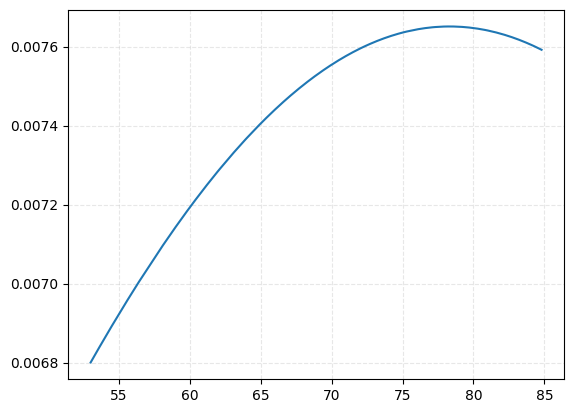

In [239]:
# calculate probability density function
life_expectancy_mean = data_description.life_expectancy.mean()
life_expectancy_std = data_description.life_expectancy.std()

display(Markdown(f"$$\mu={life_expectancy_mean:.2f}$$"))
display(Markdown(f"$$\sigma={life_expectancy_std:.2f}$$"))

pdf = stats.norm.pdf(life_expectancy.sort_values(), life_expectancy_mean, life_expectancy_std)

plt.plot(life_expectancy.sort_values(), pdf)
plt.grid(True, alpha=0.3, linestyle="--")
plt.show()

Note: We are correlating HDI which isn't an SDG but rather a scale taking into account other SDGs. We need to correlate 2 SDG's for the presentation to be valid, so this is just an example.

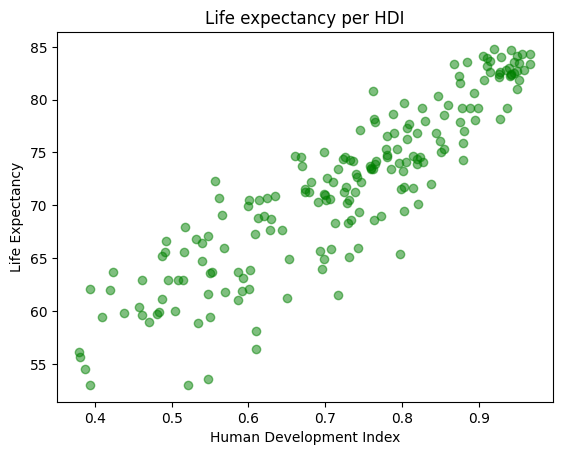

In [240]:

plt.scatter(HDI,life_expectancy, color='g', alpha=0.5)
plt.xlabel('Human Development Index')
plt.ylabel('Life Expectancy')
plt.title('Life expectancy per HDI')
plt.show()

Here we can see that as our independent variable in this example the Human Development Index (HDI) rises, so does our dependent variable life expectancy. This indicates a positive relationship between the two variables, suggesting that higher HDI values are associated with longer life expectancy. Since both HDI and life expectancy are continuous variables (with HDI being an interval variable and life expectancy being a ratio variable), Pearson's correlation is appropriate for analyzing this relationship, and we can assume a positive linear correlation.

In [241]:
r = HDI.corr(life_expectancy)
print(f"Pearsons Correlation Coefficient: {r:.2f}")
display(Markdown(f"$$r={r:.2f}$$"))

Pearsons Correlation Coefficient: 0.90


$$r=0.90$$

Our data shows a strong positive correlation between HDI and life expectancy.

|Correlation Coefficient (r)|	Interpretation|
| --- | --- |
| 1.0 | Perfect Positive Correlation |
| 0.7 to 0.99 | Strong Positive Correlation |
| 0.3 to 0.69 |	Moderate Positive Correlation |
| 0 to 0.29	| Weak Positive Correlation |
| 0	| No Correlation | 
| -0.29 to 0 | Weak Negative Correlation | 
| -0.3 to -0.69 |	Moderate Negative Correlation |
| -0.7 to -0.99	| Strong Negative Correlation |
| -1.0	Perfect | Negative Correlation |

In order to assess the reliability of our prediction later on, we must determine the coefficient of determination $r^2$. It allows us to provide insight into the strength of the relationship between the dependent and independent variables. If the value is low in this context, the model may not predict the life expectancy well and could suggest the need for additional variables.

In [242]:
display(Markdown(f"$$r^2={(abs(0.1-(r*r)*100)):.2f}$$"))

$$r^2=80.61$$

The $r^2$ indicates that $80.61\%$ variation in the dependent variable (life expectancy) is explained by the independent variable (HDI). Implying a strong relationship between the two, in this case, HDI explains a large portion of changes in life expectancy, making it a meaningful predictor. It also suggests that $19.39\%$ variation in life expectancy is due to other factors that are not included in the model. This could indicate that there are other influential variables that are worth investigating.

Now that we have established our variables exhibit a linear relationship through visual inspection using a scatter plot and through
Pearson's coefficient we can move on to determining the equation of the regression line used in order to see the trend and make predictions
on the basis of the data.

Note: errors occur due to missing values in the dataset, which results into lacking coefficients and can mess with the linear algebra matrix manipulations and is the reason why we disregard the last two countries.

We can represent the regression equation as:

$$y = a + bx$$

* $y$ is the dependent variable, in this case, the life expectancy as related to HDI.
* $x$ is the independent variable, here representing HDI.
* $a$ is the intercept of the regression line, which represents the expected value of $y$ when $x=0$
* $b$ is the slope of the regression line, indicating how much y (life expectancy) is expected to change with each
increase of x (HDI).

In [243]:
# calculate the regression line
# Using numpy.polyfit to get the slope (m) and intercept (b)
slope, intercept = np.polyfit(HDI, life_expectancy, 1)

# create the regression line
data['predicted_life_expectancy'] = intercept + slope * HDI

print(f'The equation of the regression line is: Life Expectancy = {intercept:.2f} + {slope:.2f} * HDI')
display(Markdown(f"$$y = {intercept:.2f} + {slope:.2f}x$$"))

The equation of the regression line is: Life Expectancy = 38.90 + 45.51 * HDI


$$y = 38.90 + 45.51x$$

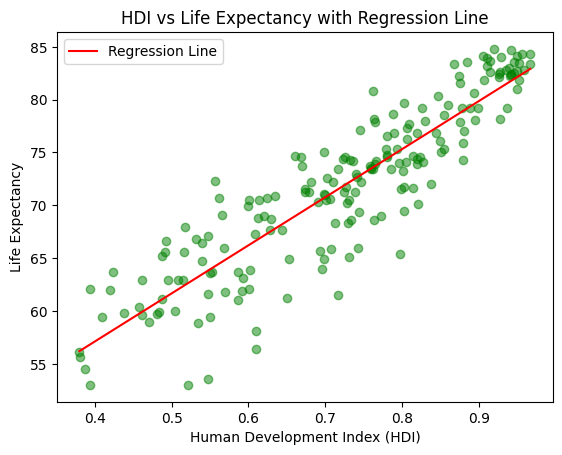

In [244]:
# plot the regression line
plt.scatter(HDI, life_expectancy, color='g', alpha=0.5)
plt.plot(HDI, data['predicted_life_expectancy'], color='red', label='Regression Line')
plt.title('HDI vs Life Expectancy with Regression Line')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

## Summary...

Our simple regression model shows that for a country with a higher HDI, we can expect a higher life expectancy.

---

# Correlation between life expectancy and educational attainment

We have two datasets relating to SDG 4 Quality education. 

For our arbitrary case, we'll focus on SDG 4.4 (mean school years) examining the correlation between the mean years of schooling for each country (independent variable) and life expectancy (dependent variable). Examining the how changes in education might influence life expectancy outcomes.

In [245]:
display(Markdown(f"Life Expectancy: "))
display(Markdown(f"$$\mu={data.life_expectancy.mean():.2f}$$"))
display(Markdown(f"$$\sigma={data.life_expectancy.std():.2f}$$"))

Life Expectancy: 

$$\mu=71.84$$

$$\sigma=7.86$$

In [246]:
display(Markdown(f"Mean Schooling years: "))
display(Markdown(f"$$\mu={data.mean_schooling_years.mean():.2f}$$"))
display(Markdown(f"$$\sigma={data.mean_schooling_years.std():.2f}$$"))

Mean Schooling years: 

$$\mu=9.01$$

$$\sigma=3.22$$

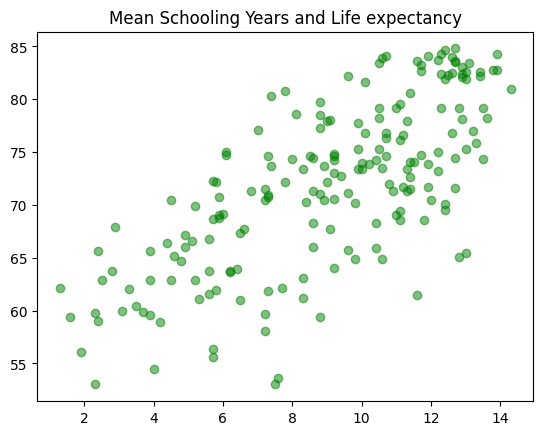

In [247]:
mean_schooling_years = data['mean_schooling_years']

# independent variable, dependent variable
plt.scatter(mean_schooling_years, life_expectancy, color="g", alpha=0.5)
plt.title("Mean Schooling Years and Life expectancy")
plt.show()

In [248]:
r = mean_schooling_years.corr(life_expectancy)
print(f"Pearsons Correlation Coefficient: {r:.2f}")
display(Markdown(f"$$r={r:.2f}$$"))

Pearsons Correlation Coefficient: 0.72


$$r=0.72$$

In [249]:
# coefficient of determinance, how much the data fits the model
display(Markdown(f"$$r^2={(r*r):.2f}$$"))

$$r^2=0.52$$

A $r^2$ of 0.52 indicates 

In [254]:
slope, intercept = np.polyfit(mean_schooling_years, life_expectancy, 1)

# create the regression line
data['predicted_mean_schooling_years'] = intercept + slope * mean_schooling_years

print(f'The equation of the regression line is: Life Expectancy = {intercept:.2f} + {slope:.2f} * mean_schooling_years')
display(Markdown(f"$$y = {intercept:.2f} + {slope:.2f}x$$"))

The equation of the regression line is: Life Expectancy = 56.04 + 1.75 * mean_schooling_years


$$y = 56.04 + 1.75x$$

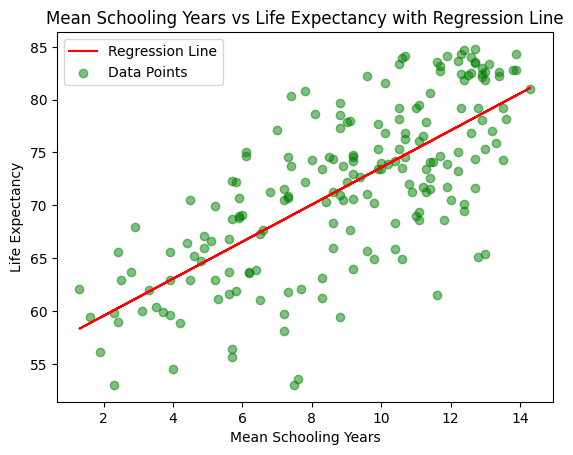

In [255]:
# Plot the scatter plot
# plt.scatter(life_expectancy, mean_schooling_years, color='g', alpha=0.5, label='Data Points')
plt.scatter(mean_schooling_years, life_expectancy, color='g', alpha=0.5, label='Data Points')

# Plot the regression line
plt.plot(mean_schooling_years, data['predicted_mean_schooling_years'], color='red', label='Regression Line')

# Add titles and labels
plt.title('Mean Schooling Years vs Life Expectancy with Regression Line')
plt.xlabel('Mean Schooling Years')
plt.ylabel('Life Expectancy')
plt.legend()

# Show the plot
plt.show()